In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data #tf has mnist for import

/Library/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
mnist = input_data.read_data_sets(train_dir="MNIST_data/",one_hot=True)
#we utilize the one_hot to have the data being imported, flattened and normalized. 
#28x28 pixels = 784 flattened data for each image
#note that this does not have spatial information for us to use...hence it's inferior to cnn
#the output is a special datatype/class, with its own unique methods that one might not always have the luxury to have

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
type(mnist) #special datatype

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [12]:
#how to view the sizes of dataset
mnist.train.num_examples

55000

In [13]:
mnist.test.num_examples

10000

In [14]:
mnist.validation.num_examples

5000

# To Visualize the data

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
#this implies that there are 550k training samples, each with a matrix size of 784x1 being flattened from 28x28
print(mnist.train.images.shape)
mnist.train.images

(55000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

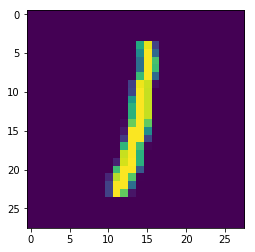

In [22]:
#let's view 1 of these images, let's pick the 5th one
plt.imshow(mnist.train.images[4].reshape(28,28))

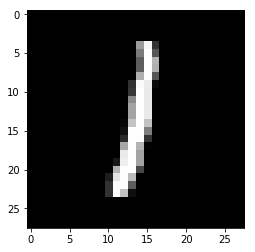

In [23]:
#to view in greyscale
plt.imshow(mnist.train.images[4].reshape(28,28),cmap="gist_gray")

Our data input is already normalized between 0 and 1 with intensity of the pixels as the magnitude. Therefore it's there is no preprocessing techniques need to be done to use tensorflow with

# Create a Model

In [24]:
x = tf.placeholder(dtype=tf.float32,shape = [None,784]) #we dont have the batch size for input yet, but each input will be a 784 array of features

In [26]:
#weight initialization, it's not good to use just 0's but we'll stick to it for simplicity
W = tf.Variable(tf.zeros([784,10])) #size of 10 for the 10 numbers features output. Input is 784 1d array

In [29]:
b = tf.Variable(tf.zeros([10])) #zero biases

In [31]:
#create the computational graph
y = tf.matmul(x,W) + b #watch for the matrix dimensions

In [32]:
#Create loss function and Optimizer
y_true = tf.placeholder(tf.float32,shape=[None,10]) #10 outputs, we don't know the batch size. Must match up with x size

In [50]:
#Cross entropy loss for multi labels. There's an average term from the wikipedia page. Hence, tf.reduce_mean()
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y)) #logits=prediction.

In [51]:
#after the loss, we need to find a way to optimize our model
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.3) #artitrary learning rate

In [36]:
train = optimizer.minimize(loss=cross_entropy)

# Create a session to run our computational graph

In [37]:
init = tf.global_variables_initializer()

In [49]:
with tf.Session() as sess:
    sess.run(init)
    #train the model for 1000 steps on training set using built in batch feeder from the mnist library
    for steps in range(1000):
        #we don't always have the luxury of retrieving batches from unique library like this
        batch_x, batch_y = mnist.train.next_batch(batch_size=50)
        sess.run(train,feed_dict={x:batch_x, y_true:batch_y}) #recall our keys are the placeholders
    
    #to test the training model
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1)) #recal all these are placeholders above
    #reduce_mean will find the average of our bool values array. However, we need to cast it to numerical first
    accuracy = tf.reduce_mean(tf.cast(matches,dtype=tf.float32))
    
    #this refers all the way back to the previous run for our feed_dict. in this case, we need the test label and input
    test_acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y_true:mnist.test.labels})
    print(test_acc)

0.9135
